In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [92]:
df = pd.read_csv("dinos.csv")

In [93]:
df_scaled = df.drop("Weight", axis=1)
df_scaled["Gender"] = (df_scaled["Gender"]=="M").astype("int16")
df_scaled = df_scaled.assign(Volume=df_scaled["Length"]*df_scaled["Height"]*df_scaled["Width"])

#df_scaled = df_scaled.drop("Species", axis=1)

m,n=df_scaled.shape

# An attempt to use the Species Feature
"""
for i in range(m):
    if df_scaled["Species"][i] == "Iguanadon":
        df_scaled["Species"][i] = 1.0
    elif df_scaled["Species"][i] == "Pterodactyl":
        df_scaled["Species"][i] = 2.0
    elif df_scaled["Species"][i] == "Brachiosaurus":
        df_scaled["Species"][i] = 3.0
    elif df_scaled["Species"][i] == "Stegosaurus":
        df_scaled["Species"][i] = 4.0
    elif df_scaled["Species"][i] == "Plateosaurus":
        df_scaled["Species"][i] = 5.0
    elif df_scaled["Species"][i] == "Vulcanodon":
        df_scaled["Species"][i] = 6.0
"""
df_scaled["Species"] = df_scaled["Species"].replace({"Iguanadon":1.0, 
                                                     "Pterodactyl":2.0, 
                                                     "Brachiosaurus":3.0,
                                                     "Stegosaurus":4.0,
                                                     "Plateosaurus":5.0,
                                                     "Vulcanodon":6.0,
                                                     "Raptor":7.0})

df_scaled.head()

,Species,Length,Age,TailLength,Height,Width,Gender,Completeness,Volume
0,1.0,59.0,63.4,68.0,10.8120,7.480,1,0.545,4771.551840
1,2.0,22.0,24.0,25.5,6.3750,3.825,1,0.531,536.456250
2,2.0,37.1,40.0,42.5,11.1350,6.630,0,0.661,2738.909355
3,3.0,23.2,25.4,30.0,11.5200,4.020,0,0.793,1074.401280
4,2.0,36.5,39.0,41.4,11.1366,6.003,1,0.931,2440.134858


In [94]:
for i in range(n):
    print(type(df_scaled.iloc[:,i][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.int16'>
<class 'numpy.float64'>
<class 'numpy.float64'>


# Scaling

In [95]:
# Min-Max Scaling (Normalization)
"""
for i in range(n):
    series = df_scaled.iloc[:, i]
    min_value = series.min()
    max_value = series.max()
    df_scaled.iloc[:, i] = (series - min_value) / (max_value - min_value)
"""

#standardization Scaling 

for i in range(n):    
    x= df_scaled.iloc[:, i]
    mean_value = x.mean()
    std_deviation = abs(x.std())
    stanadardized_x = (x - mean_value) / std_deviation
    df_scaled.iloc[:, i]= stanadardized_x


df_scaled.head()

,Species,Length,Age,TailLength,Height,Width,Gender,Completeness,Volume
0,-1.227187,3.276449,3.264577,3.167285,0.429519,1.816649,0.895402,0.014552,2.642208
1,-0.688174,-0.424868,-0.412056,-0.493275,-0.605662,-0.351456,0.895402,-0.037028,-0.698052
2,-0.688174,1.085669,1.080993,0.970949,0.504877,1.312439,-1.109793,0.441923,1.039043
3,-0.149161,-0.304825,-0.281414,-0.105686,0.594700,-0.235784,-1.109793,0.928243,-0.273770
4,-0.688174,1.025648,0.987678,0.876205,0.505250,0.940509,0.895402,1.436668,0.803397


In [96]:
cols = df_scaled.columns

"""
for label in cols:
    plt.scatter(df_scaled[label], Y)
    plt.title(label)
    plt.show()
"""

'\nfor label in cols:\n    plt.scatter(df_scaled[label], Y)\n    plt.title(label)\n    plt.show()\n'

Since *Completenes* does not to have any relation to weigth we will dorp it from the dataframe 

In [97]:
df_scaled = df_scaled.drop("Completeness", axis=1)
#df_scaled = df_scaled.drop("Volume", axis=1)

# Test and Train split

In [98]:
train, test = np.split(df_scaled, [int(0.7*len(df_scaled))])

Y, Y_test = np.split(df["Weight"], [int(0.7*len(df["Weight"]))])

In [99]:
Y = df["Weight"]
X = train.to_numpy()
#cols = ["Length", "Age", "TailLength", "Height", "Width", "Gender", "Volume"]
m,n = train.shape

As most of the data seems to following an exponential graph an exponential curve would be better fitting to to the model.

In [100]:
w = np.zeros(n) #parameter vector
b=0

alpha = 0.0001 #learniing rate
#exp 0.0001, linear 0.01

lamb = 200000# regularization factor
#exp 200000, linear 1000

epochs = 1000 #number of iterations
#exp 1000 linear 1000

Cost=np.zeros(epochs)
iter = np.linspace(0, epochs-1, epochs)

for i in range(epochs):
    Y_pred = pd.Series(np.zeros(m))#a pandas series 
    
    #linear curve (line)
    #Y_pred = np.dot(X, w) + b * pd.Series(np.ones(m)) 

    #exponential curve
    Y_pred = np.exp(X@w + b * pd.Series(np.ones(m))) 
    
    D_w = (1/m)*np.sum(Y_pred- Y)*X + (lamb/(2*m))*w
    D_b = (1/m)*np.sum(Y_pred- Y)

    cost = (1/(2*m))*np.sum(pow(Y_pred-Y, 2)) + (lamb/(2*m))*np.sum(w**2)
    #exp cost = to be figured
    Cost[i]= cost
    
    w = w - alpha * D_w[1]
    b = b - alpha * D_b

print(w, b)

[-1.48552047e-14 -9.17137683e-15 -8.89479976e-15 -1.06480341e-14
 -1.30740686e-14 -7.58666721e-15  1.93284999e-14 -1.50684437e-14] 5.96672869033932


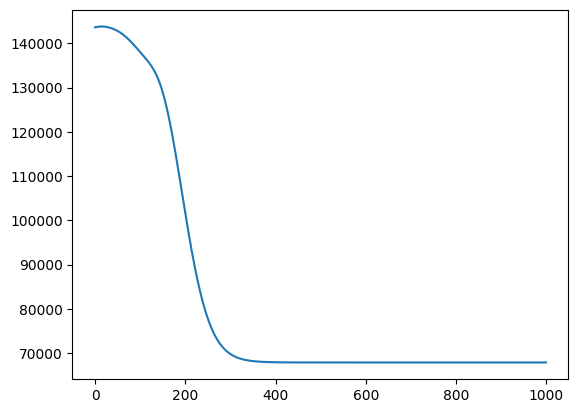

In [101]:
plt.plot(iter, Cost)
plt.show()

In [102]:
print(Cost.min())

67874.21684198435


In [103]:
print(cost)

67874.21684198435


In [104]:

X_test = test.to_numpy()
cols = ["Length", "Age", "TailLength", "Height", "Width", "Gender", "Volume"]
m_test, n_test = test.shape
test.shape

(48, 8)

In [105]:
Y_test_pred = X_test @ w + b
cost_test = (1/(2*m_test))*np.sum(pow(Y_test_pred-Y_test, 2)) 
print(cost_test)

138197.94932910506


In [106]:
error_test = abs(Y_test_pred - Y_test)
error_test_p = np.sum(error_test*100/Y_test)
print(error_test_p)

4345.029060651291


In [107]:
from sklearn.metrics import mean_absolute_percentage_error

print(mean_absolute_percentage_error(y_pred=Y_test_pred, y_true=Y_test))

0.9052143876356856
